# Week 2 Mini Project: From Genomics to Proteomics Analysis
### Integrative Bioinformatics Workflow using the Unkown Isolate and vibrio cholerae Microorganisms

**Objectives:**
- Perform sequence alignment and BLAST analysis using nucleotide FASTA files.
- Construct a phylogenetic tree based on sequence similarity.
- Translate DNA sequences to proteins and perform comparative proteomic analysis.
- Visualize molecular properties of proteins across different microorganisms.


## Step 1: Import Required Libraries

In [ ]:
from Bio import SeqIO, Entrez, AlignIO, Phylo
from Bio.Blast import NCBIWWW, NCBIXML
from Bio.Align.Applications import ClustalwCommandline
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [ ]:
!pip install biopython
from Bio import SeqIO, Entrez, AlignIO, Phylo
from Bio.Blast import NCBIWWW, NCBIXML
!apt-get install -y clustalo
from Bio.SeqUtils.ProtParam import ProteinAnalysis

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 28.2 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libargtable2-0
The following NEW packages will be installed:
  clustalo libargtable2-0
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 273 kB of archives.
After this operation, 694 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libargtable2-0 amd64 13-1.1 [14.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 clustalo amd64 1.2.4-7 [259 kB]
Fetched 273 kB in 1s (336 kB/s)
Selecting previously unselected package libargtable2-0.
(Reading database ... 121703 files and directories currently installed.)
Preparing to unpack .../libargtable2-0_13-1.1_amd64.deb ...
Unpacking libargtable2-0 (13-1.1) ...
Selecting previously unselected package clustalo.
Preparing to unpack .

In [ ]:
!pip install biopython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.9 MB/s eta 0:00:00


In [ ]:
!pip uninstall -y biopython
!apt-get remove -y python3-biopython
!pip install biopython
!apt-get install -y clustalw

Found existing installation: biopython 1.86
Uninstalling biopython-1.86:
  Successfully uninstalled biopython-1.86
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Package 'python3-biopython' is not installed, so not removed
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.
  Using cached biopython-1.86-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl.metadata (13 kB)
Using cached biopython-1.86-cp312-cp312-manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_28_x86_64.whl (3.2 MB)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
clustalw is already the newest version (2.1+lgpl-7).
0 upgraded, 0 newly installed, 0 to remove and 41 not upgraded.


This cell explains part of step 2:

It talks about **List Comprehension**. List comprehension is a simple way to write loops inside lists.


The syntax for List comprehension is:

[`expression` for `item` in `input_list`]

expression can be, e.g `item + 2`

item in your assignment instance are items in your fasta files

your fasta files are the input_list.

## Step 2: Load the 12 Microorganism FASTA Files

In [ ]:
# created the folder and uploaded the two files
!mkdir -p microorganisms_fasta
!mv "Vibrio cholerae 16s.fasta" microorganisms_fasta/
!mv "Unknown_isolate.fasta" microorganisms_fasta/

In [ ]:
fasta_dir = 'microorganisms_fasta'
fasta_files = [f for f in os.listdir(fasta_dir) if f.endswith('.fasta')]

records = []
for file in fasta_files:
    path = os.path.join(fasta_dir, file)
    seq_record = SeqIO.read(path, 'fasta')
    records.append(seq_record)

print(f'Loaded {len(records)} microorganism sequences.')


Loaded 2 microorganism sequences.


## Step 3: Perform BLAST Search (Example for One Organism)

In [ ]:
sequence = records[0]
result_handle = NCBIWWW.qblast('blastn', 'nt', sequence.seq)
with open('blast_result.xml', 'w') as out_handle:
    out_handle.write(result_handle.read())
print('BLAST complete and result saved.')

In [ ]:
sequence = records[0]
result_handle = NCBIWWW.qblast('blastn', 'nt', sequence.seq)
with open('blast_result.xml', 'w') as out_handle:
    out_handle.write(result_handle.read())
print('BLAST complete and result saved.')


BLAST complete and result saved.


## Step 4: Parse BLAST Results and Extract Top Hits

In [ ]:
result_handle = open('blast_result.xml')
blast_record = NCBIXML.read(result_handle)
result_handle.close()

for alignment in blast_record.alignments[:3]:
    print(alignment.title)
    for hsp in alignment.hsps[:1]:
        print('E-value:', hsp.expect, '| Bit score:', hsp.bits)

gi|52426724|gb|AY735392.1| Neisseria meningitidis strain N.544/03 16S ribosomal RNA gene, complete sequence
E-value: 0.0 | Bit score: 2654.04
gi|1442649924|gb|CP031328.1| Neisseria meningitidis strain M18755 chromosome, complete genome
E-value: 0.0 | Bit score: 2645.02
gi|2999966781|gb|CP141623.1| Neisseria meningitidis strain NX-21-82 chromosome, complete genome
E-value: 0.0 | Bit score: 2645.02


## Step 5: Multiple Sequence Alignment and Phylogenetic Tree Construction

In [ ]:
# Example: Using ClustalW (requires installation)
alignment_file = 'microbial_alignment.aln'
clustalw_cline = ClustalwCommandline('clustalw2', infile='combined_sequences.fasta')
stdout, stderr = clustalw_cline()

align = AlignIO.read(alignment_file, 'clustal')
Phylo.draw(Phylo.read('combined_sequences.dnd', 'newick'))


 CLUSTAL 2.1 Multiple Sequence Alignments


Sequence format is Pearson
Sequence 1: NR_044050.1         1687 bp
Sequence 2: Unknown_isolate     1687 bp

Phylogenetic tree:
(NR_044050.1:0.18331,Unknown_isolate:0.18331);

## Step 6: Translation of DNA to Protein Sequences

In [ ]:
protein_records = []
for record in records:
    protein_seq = record.seq.translate(to_stop=True)
    protein_records.append({'Organism': record.id, 'Protein_Sequence': protein_seq})

proteins_df = pd.DataFrame(protein_records)
proteins_df.head()

In [ ]:
protein_records = []
for record in records:
    protein_seq = record.seq.translate(to_stop=True)
    protein_records.append({'Organism': record.id, 'Protein_Sequence': protein_seq})

proteins_df = pd.DataFrame(protein_records)
proteins_df.head()

,Organism,Protein_Sequence
0,Unknown_isolate,"(L, N, A, G, G, M, L, Y, T, C, K, S, D, G, S, ..."
1,NR_044050.1,"(I, E, R, W, R, Q, A)"


## Step 7: Compute Basic Protein Properties

In [ ]:
properties = []
for entry in protein_records:
    seq_str = str(entry['Protein_Sequence'])
    analysis = ProteinAnalysis(seq_str)
    props = {
        'Organism': entry['Organism'],
        'Length': len(seq_str),
        'Molecular_weight': analysis.molecular_weight(),
        'Aromaticity': analysis.aromaticity(),
        'Isoelectric_Point': analysis.isoelectric_point(),
        'Instability_Index': analysis.instability_index()
    }
    properties.append(props)
protein_properties = pd.DataFrame(properties)
protein_properties.head()

,Organism,Length,Molecular_weight,Aromaticity,Isoelectric_Point,Instability_Index
0,Unknown_isolate,37,3918.2845,0.027027,6.381166,39.135135
1,NR_044050.1,7,958.0753,0.142857,9.598843,180.685714


## Step 8: Visualize Comparative Protein Properties

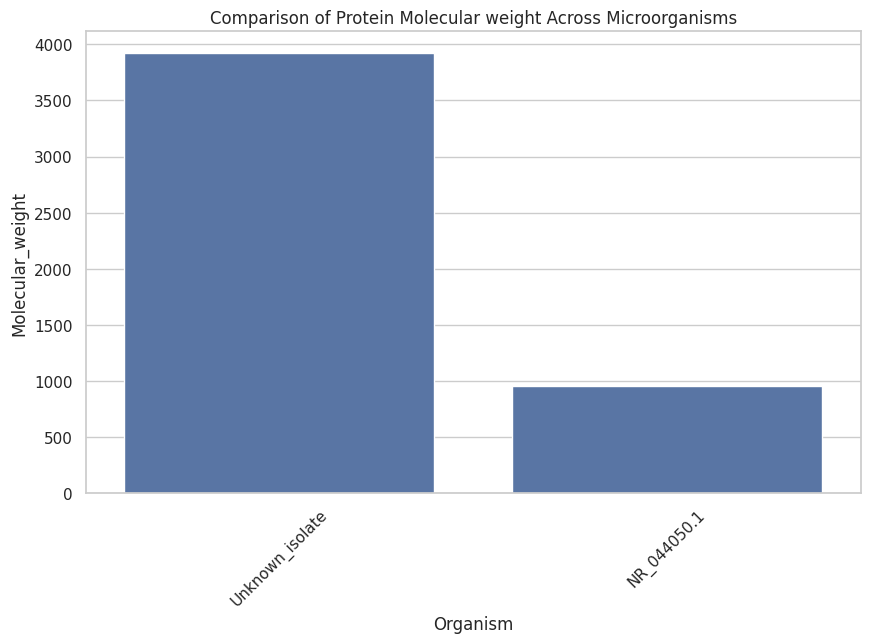

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.barplot(x='Organism', y='Molecular_weight', data=protein_properties)
plt.title('Comparison of Protein Molecular weight Across Microorganisms')
plt.xticks(rotation=45)
plt.show()

The data show a clear difference in protein size between the two microorganisms. The Unknown isolate has a protein molecular weight of 3918.28 Da and a length of 37 amino acids, while the Vibrio cholerae (NR_044050.1) has a much lower molecular weight of 958.08 Da and a length of 7 amino acids. This means the unknown isolate protein is significantly larger and likely more complex. The large difference in molecular weight and sequence length indicates that the proteins are not closely similar and may perform different biological functions. This suggests a high level of divergence between the protein profiles of the unknown isolate and Vibrio cholerae.

## Step 9: Assignment Task
1. Perform BLAST for all 12 microorganisms and save results.
2. Create a multiple sequence alignment and phylogenetic tree.
3. Translate all sequences to proteins and compute molecular weight and pI.
4. Create a heatmap comparing molecular properties across microorganisms.
5. Write a brief interpretation (5–8 lines) describing what the data reveal about protein similarities or divergence.